# Seasonal Flu Vaccine Analysis

## Overview
This analysis models the likely-hood of an individual choosing to get the seasonal flu vaccine. The goal of this analysis is to give the CDC an understanding of the most impactful factors that will predict if someone will get the seasonal flu vaccine. Knowing which factors are most impactful can be used to better understand what leads an individual to choose to get vaccinated. This interpetation can be used to better market the vaccine for the public outreach team.

The analysis found that the most relevant factor is if a doctor advises an individual to get the seasonal flu vaccine. Followed by an individual's opinion of the seasonal flu effectiveness.

In response to these findings I recommend that the FDA: 
- Doctors recommending the vaccine to their patients, was the clearest connection the model found.

- A person's opinion on the Season Flu Vaccine was the most influential feature, yet the connection between model performance and interpretation is unclear at this stage in the investigation.

- The final model had a precision of 78% and an accuracy of 79% when predicting individuals who were vaccinated. 



## Business Problem & Data Understanding
The CDC has inquired about the common factors of people who choose to get the seasonal flu vaccine. Knowing these factors, the CDC public outreach team hopes to get a better idea on who/what to focus on when trying to promote the seasonal flu vaccine. 

This analysis uses the national flu survey that was issued in 2009. Each row represents one person who took the survey and each column represents a question that was on that survey. 

The survey covered questions about both the seasonal flu vaccine and the H1N1 vaccine, for the purpose of this business problem only columns that pertained to the seasonal flu vaccine were investigated. In this analysis 26707 rows and 30 different columns were investigated. The target variable was `seasonal_vaccine`.

For this binaray classification problem, the final model was an ensemble. 

## OBTAIN

Import data and inspect the data



In [1]:
# Import basic libraries
import pandas as pd
import numpy as np

# Import data
df1 = pd.read_csv('data/training_set_labels.csv')
df1.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [2]:
# Import data
df2 = pd.read_csv('data/training_set_features.csv')
df2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


This dataset contains data on both the H1N1 vaccine and the seasonal flu vaccine. My school, the Flatiron School, prompts that only one of the vaccines should be analyzed for this project. A basic investigation of both vaccines is taken below to help me decide which vaccine to analyze for this project. 

In [3]:
# View count of vaccinated people vs. unvaccinated people
df1['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [4]:
# View count of vaccinated people vs. unvaccinated people
df1['seasonal_vaccine'].value_counts()

0    14272
1    12435
Name: seasonal_vaccine, dtype: int64

Since I have been instructed to only pick one vaccine, I will go with the seasonal flu vaccine. This is because the data is more balanced, which means there is a higher chance of a successful model.

In [5]:
# view columns
df2.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [6]:
# drop the H1N1 data from the dataset since the business problem is only
# about the seasonal flu
df_flu = df2.drop(['h1n1_concern', 'h1n1_knowledge', 'doctor_recc_h1n1',
                  'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
                 'opinion_h1n1_sick_from_vacc'], axis = 1, inplace=True)

In [7]:
# combine the dataset containing just the target (df1) and the data set
# containing the features (df_flu)
data = df2.merge(df1, on= 'respondent_id', how = 'inner')

# drop 'h1n1_vaccine' column since business problem is just for seasonal flu
data.drop('h1n1_vaccine', axis = 1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_seasonal         24547 non-null  float64
 9   chronic_med_condition        25736 non-null  float64
 10  child_under_6_months         25887 non-null  float64
 11  health_worker                25903 non-null  float64
 12  health_insurance             14433 non-null  float64
 13  opinion_seas_vac

## Explore data

In [8]:
# We see there are some NaN values that need to be delt with 
print(data.isna().sum())

respondent_id                      0
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
hhs_geo_region                     0
census_msa                         0
household_adults                 249
h

There are multiple ways to deal with missing data. To start, there are three columns with around half the data missing. With such a significant amount of data missing it would be a bad idea to assign that data to an assumed value such as the majority class. Making an assumption on half the data for a column can cause a unexpect and fabricated correlation in the model. For that reason for the three columns `employment_industry`, `employment_occupation`, and `health_insurance` will have its missing data replaced with a new category, 'unknown'.

For the rest of the columns, there is significantly less data missing. For those, I'm choosing to group missing data with the most frequent/majority class. This is because I think it is more likely much of that missing data will actually be placed in the correct category. If I were to add a new category for 'Unknown' for those columns I could unintentionally skew the data more than grouping missing data with the majority class. 

However, just to make sure that picking the majority class is a good option, we can take a closer look at columns with missing data and see how balanced those columns are.

In [9]:
# take a look at at the distribution of the data for some of the column
dashes = '-'* 40
print(data['marital_status'].value_counts())
print(dashes)
print(data['income_poverty'].value_counts())
print(dashes)
print(data['chronic_med_condition'].value_counts())
print(dashes)
print(data['doctor_recc_seasonal'].value_counts())
print(dashes)
print(data['opinion_seas_vacc_effective'].value_counts())

Married        13555
Not Married    11744
Name: marital_status, dtype: int64
----------------------------------------
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64
----------------------------------------
0.0    18446
1.0     7290
Name: chronic_med_condition, dtype: int64
----------------------------------------
0.0    16453
1.0     8094
Name: doctor_recc_seasonal, dtype: int64
----------------------------------------
4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64


We see here that generally there is a category that has a value count that is significantly higher than the rest. Making the assumption that the missing data best fits with the majority category, should have less of an impact than other options such as creating a new category or grouping with other categories.

However, this can be changed later on if it is seen there are more negative repercussions than originally expected. 

In [10]:
# closer look at data
data.dtypes

respondent_id                    int64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa               

In [11]:
# closer look at columns with object dtype and we see this is categorical data
print(data.value_counts(['race']))
print(dashes)
print(data.value_counts(['education']))
print(dashes)
print(data.value_counts(['income_poverty']))

race             
White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
dtype: int64
----------------------------------------
education       
College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
dtype: int64
----------------------------------------
income_poverty           
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
dtype: int64


In [12]:
# closer look at numeric columns
print(data.value_counts(['behavioral_avoidance']))
print(dashes)
print(data.value_counts(['behavioral_touch_face']))
print(dashes)
print(data.value_counts(['household_adults']))

behavioral_avoidance
1.0                     19228
0.0                      7271
dtype: int64
----------------------------------------
behavioral_touch_face
1.0                      18001
0.0                       8578
dtype: int64
----------------------------------------
household_adults
1.0                 14474
0.0                  8056
2.0                  2803
3.0                  1125
dtype: int64


We can see that the numeric data is a mixture of yes (1) or no (0) questions along with actual numeric values such as with the number of adults in a household. Even though these are numeric values they are actually representing a category, since these are not continuous  and should not be treated as such.

The columns with the object data type are broken down into various different categories.

We can use one-hot encoder to turn the categorical data in both the numeric dtype & object dtype into a series of yes (1) no (0) questions. Once this is done all the columns will be on the same scale which is necessary for proper modeling.

In [13]:
data.columns

Index(['respondent_id', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'income_poverty', 'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_industry', 'employment_occupation',
       'seasonal_vaccine'],
      dtype='object')

In [14]:
# use SimpleImputer to fill NaN values with the majority class for 
# columns without a significant amount of NaN
from sklearn.impute import SimpleImputer
cols = ['behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex',
       'marital_status', 'rent_or_own', 'employment_status',
       'hhs_geo_region', 'census_msa', 'household_adults',
       'household_children', 'employment_occupation', 'income_poverty']
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
data[cols] = imputer.fit_transform(data[cols])
data[cols].isna().sum()

behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_adults               0
household_children             0
employment_occupation          0
income_poverty                 0
dtype: int64

In [15]:
# Use SimpleImputer to fill in the significant amount of NaN values
# with 'unknown'
from sklearn.impute import SimpleImputer
cols = ['employment_industry', 'employment_occupation', 'health_insurance']
imputer = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value='unknown')
data[cols] = imputer.fit_transform(data[cols])
data[cols].isna().sum()

employment_industry      0
employment_occupation    0
health_insurance         0
dtype: int64

In [16]:
#double check the unknown value is now there instead of NaN
data['employment_industry'].value_counts()

unknown     13330
fcxhlnwr     2468
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [17]:
data['employment_occupation'].value_counts()

xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

Now that we have dealt with the NaN data, we can move onto one-hot encoding. First we should double check we know all the numerical columns are not continuous and can be represented by a category. 

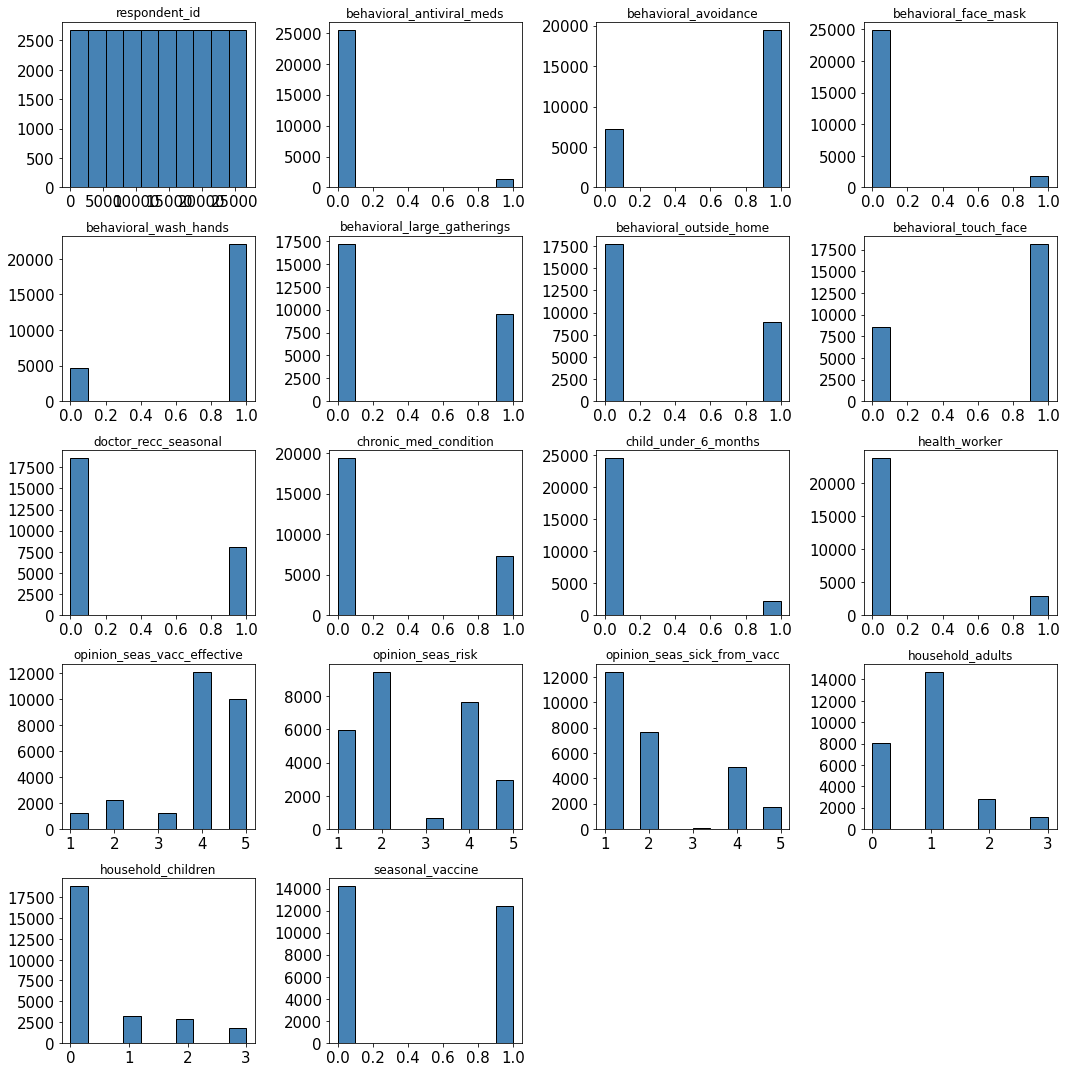

In [18]:
# quick visualization of the numerical dtype columns 
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(color='steelblue', edgecolor='black',
           xlabelsize=15, ylabelsize=15, grid=False, figsize = (15, 15))
plt.tight_layout() 

We will want to turn the columns that have more values than 0 (no) or 1 (yes) into objects and then one-hot encode them, then all columns will be answered in a yes (1) or no (0) fashion. Doing this will have all the columns be binary. 

In [19]:
#one-hot encode the numerical data that has more than 0 or 1 response
num2cat = ['opinion_seas_vacc_effective','opinion_seas_risk', 'opinion_seas_sick_from_vacc',
          'household_adults', 'household_children']
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
num2cat_ohe = encoder.fit_transform(data[num2cat])
n2c_ohe = pd.DataFrame(num2cat_ohe,columns=encoder.get_feature_names(num2cat),
                     index=data.index)

In [20]:
# now all responses are either 0 (no) or 1 (yes)
n2c_ohe.describe()

,opinion_seas_vacc_effective_2.0,opinion_seas_vacc_effective_3.0,opinion_seas_vacc_effective_4.0,opinion_seas_vacc_effective_5.0,opinion_seas_risk_2.0,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.00000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,0.082600,0.045531,0.452728,0.373423,0.354514,0.025349,0.285693,0.110757,0.285805,0.003520,0.181675,0.06444,0.551279,0.104954,0.042124,0.118883,0.107238,0.065414
std,0.275282,0.208470,0.497770,0.483722,0.478375,0.157186,0.451752,0.313837,0.451806,0.059223,0.385584,0.24554,0.497373,0.306500,0.200875,0.323656,0.309421,0.247259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
# one-hot encoder requires input to be uniformly string 
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

cat_cols = data.select_dtypes(include=['object']).columns.to_list()
data[cat_cols] = data[cat_cols].apply(lambda col: LE.fit_transform(col.astype(str)), axis=0)

In [22]:
# now one-hot encode object dtype columns
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')

cat_cols_ohe = encoder.fit_transform(data[cat_cols])
cat_ohe = pd.DataFrame(cat_cols_ohe,columns=encoder.get_feature_names(cat_cols),
                     index=data.index)
cat_ohe.head()

,health_insurance_1,health_insurance_2,age_group_1,age_group_2,age_group_3,age_group_4,education_1,education_2,education_3,race_1,...,employment_occupation_13,employment_occupation_14,employment_occupation_15,employment_occupation_16,employment_occupation_17,employment_occupation_18,employment_occupation_19,employment_occupation_20,employment_occupation_21,employment_occupation_22
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# now that we have all the columns uniform we need to combined into one dataframe
df = pd.concat([data, cat_ohe, n2c_ohe], axis = 1)

In [24]:
# we need to remove all the orginal columns that were one-hot encoded
df.drop(columns = cat_cols, inplace=True)
df.drop(columns = num2cat, inplace=True)

In [25]:
# last step of basic cleaning is to drop the 'respondent_id' column it does 
# not contain useful data as it is just a way to id the indivual that took the survey
df.drop("respondent_id", axis=1, inplace = True)

In [26]:
# we see all columnns are binary now
df.describe()

,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,...,opinion_seas_sick_from_vacc_2.0,opinion_seas_sick_from_vacc_3.0,opinion_seas_sick_from_vacc_4.0,opinion_seas_sick_from_vacc_5.0,household_adults_1.0,household_adults_2.0,household_adults_3.0,household_children_1.0,household_children_2.0,household_children_3.0
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.00000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,0.303067,0.272962,0.080054,...,0.285805,0.003520,0.181675,0.06444,0.551279,0.104954,0.042124,0.118883,0.107238,0.065414
std,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,0.459592,0.445490,0.271382,...,0.451806,0.059223,0.385584,0.24554,0.497373,0.306500,0.200875,0.323656,0.309421,0.247259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model

All the basic data cleaning is complete. Now the data can be split in training and testing sets and we can start model building on the training data. We don't build the model on the testing data as that will be used to determine how well our models work on unseen data.

### Train Test Split

In [27]:
# perform a test train split
from sklearn.model_selection import train_test_split

target = 'seasonal_vaccine'

y = df[target]
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [28]:
# out of curiosity we can look at ther % of vaccinated people in the 
# train and test data as a reference to how well divided the data is 

print("Train percent vaccinated:", y_train.value_counts(normalize=True)[1])
print("Test percent vaccinated: ", y_test.value_counts(normalize=True)[1])

Train percent vaccinated: 0.464153769345981
Test percent vaccinated:  0.4699715441066347


The first model I will run is a logistic regression model. This is a very simple model which makes a good starting point to understanding the data.

In [29]:
# Import functions needed
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Set a C value, this tells the model how to choose the parameters & how much 
# weight to but on the training data a low C will be a more complex model but risks over fitting 
log_reg = LogisticRegression(max_iter=5000, C=1e12)
log_reg.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, max_iter=5000)

In [30]:
# make function to view model performance 
from sklearn import metrics
def model_eval(model, X_test, y_test,
               normalize='true', return_fig=False,
               classes=None, figsize=(14, 6)):
    # Get Predictions
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)
    
    # Scores 
    print(dashes)
    print("MODEL EVALUATION")
    print(dashes)
    
    print(f'Accuracy : {model.score(X_train,y_train)}')
    print(f'Precision : {metrics.precision_score(y_test, y_hat_test)}')
    print(f'Recall : {metrics.recall_score(y_test, y_hat_test)}')
    print(f'f1: {metrics.f1_score(y_test,y_hat_test)}')

    
    print(dashes)
    
    fig, axes = plt.subplots(ncols=2, figsize=figsize)
    
    ## Confusion Matrix
    metrics.plot_confusion_matrix(model, X_test,
                                  y_test, cmap='Greens',
                                  normalize='true',
                                  display_labels=classes,
                                  ax=axes[0])
    ## Plot ROC Curve
    metrics.plot_roc_curve(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1],ls=':')
    ax.grid()
    
    if return_fig:
        return fig,axes


----------------------------------------
MODEL EVALUATION
----------------------------------------
Accuracy : 0.7845731402895657
Precision : 0.7813969106783076
Recall : 0.741555130656469
f1: 0.7609548724656638
----------------------------------------


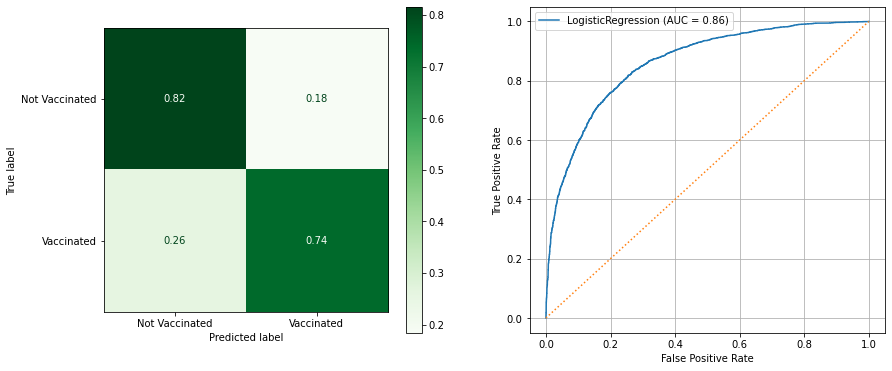

In [31]:
# set the fuction to the tree baseline model
model = log_reg
log_reg.fit(X_train, y_train)

model_eval(model,X_test,y_test,
           classes=['Not Vaccinated','Vaccinated']);

The confusion matrix shows the true negative(top left), False positive(top right), false negative(bottom left), and true positive(bottom right).

Next, the goal is to raise the accuracy by tuning the model. The confusion matrix is helpful to get a better understanding of what the model is doing wrong.

### Model 2

To improve the model I will use decision trees. Decision trees look for ways to split the features to lower uncertainty. Once a basic decision tree model is made the hyperparameters can be changed to improve the model.

----------------------------------------
MODEL EVALUATION
----------------------------------------
Accuracy : 0.9998502246630054
Precision : 0.6667745066321579
Recall : 0.6567877629063098
f1: 0.6617434580189436
----------------------------------------


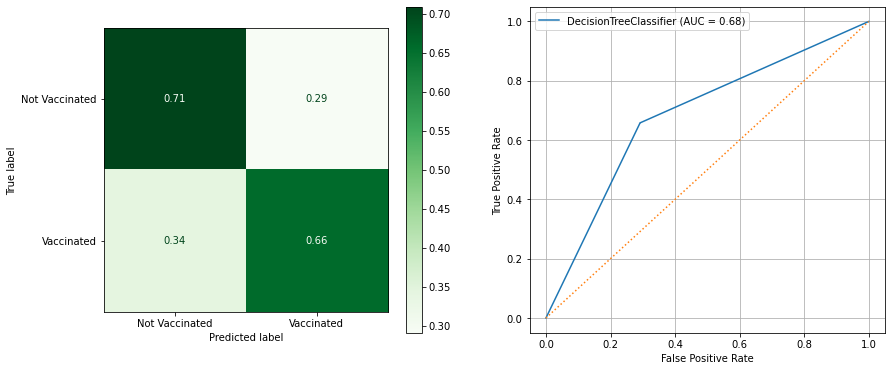

In [32]:
# make basic decision tree model
from sklearn.tree import DecisionTreeClassifier

tree_baseline = DecisionTreeClassifier()
tree_baseline.fit(X_train, y_train)

# set the fuction to the tree baseline model
model = tree_baseline
tree_baseline.fit(X_train, y_train)

model_eval(model,X_test,y_test,
           classes=['Not Vaccinated','Vaccinated']);


The accuracy is very high, there is a chance this is over fitting. Over fitting is not good since that means there is a greater chance it wont be able to predict the unseen test data well. We can look at a confusion matrix to see how well it actually does predict. The basic Decision tree model did not do well predicting the unseen data. Lets tune the decision tree and try to reduce the over fitting.

In [33]:
#view the 10 most important features
def plot_importance(model, X_train, figsize=(10,10)):
    
    features = X_train.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)
    num_features = 10
    
    plt.title('Feature Importances')
    plt.barh(range(num_features), importances[indices[-num_features:]], color='cadetblue', align='center')
    plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
    plt.xlabel('Relative Importance')
    plt.show()

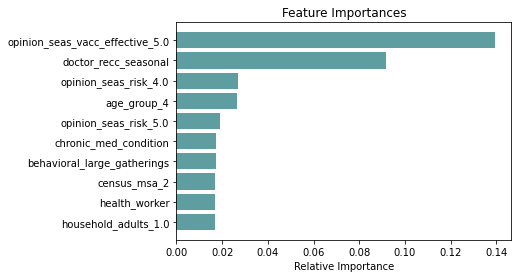

In [34]:
#feature importance is what the tree decided to split on 
plot_importance(model,X_test)

## Model 3

We can uses GridSearch CV in sklearn to find the best parameters to use to improve the decision tree model.

In [35]:
# imports needed for grid search
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [36]:
# set parameters and grid search
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

gridsearch = GridSearchCV(estimator=tree_baseline,
                          param_grid=param)

In [37]:
# Run search & takes a min or two
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [38]:
# run the gridsearch one more time based on the best parameters to see if we can find something better
param_2 = {
    'criterion': ['entropy'],
    'max_depth': [ 6, 7, 8],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf': [1, 2, 3]}

gridsearch_2 = GridSearchCV(estimator=tree_baseline,
                          param_grid=param_2)

# Run search & takes a min or two
gridsearch_2.fit(X_train, y_train)
gridsearch_2.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [39]:
# one more time to make sure that min_sample_leaf is the best it can be
param_3 = {
    'criterion': ['entropy'],
    'max_depth': [ 7],
    'min_samples_split': [5],
    'min_samples_leaf': [3, 4, 5]}

gridsearch_3 = GridSearchCV(estimator=tree_baseline,
                          param_grid=param_3)

# Run search & takes a min or two
gridsearch_3.fit(X_train, y_train)
gridsearch_3.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

----------------------------------------
MODEL EVALUATION
----------------------------------------
Accuracy : 0.7694458312531203
Precision : 0.7721293992179168
Recall : 0.6921606118546845
f1: 0.7299613510334397
----------------------------------------


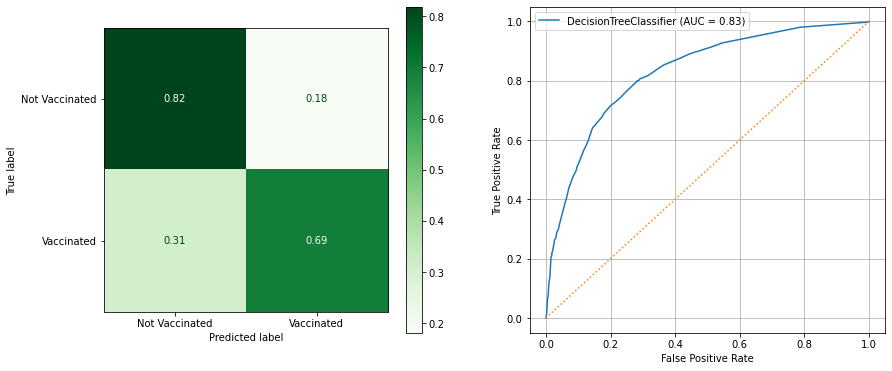

In [40]:
# Run the model evaluation with param_3 to see how it did
params = gridsearch_3.best_params_
model = DecisionTreeClassifier(**params)
model.fit(X_train, y_train)

model_eval(model,X_test,y_test,
           classes=['Not Vaccinated','Vaccinated']);


Wow, thats a lot better than the first decision tree model! We can see the improvement in the confusion matrix as the number of false pos & false negs dropped. We also see a much better looking AUC curve. 

Accuracy dropped, but before there was an accuracy of 0.99, which was too perfect and a sign of overfitting, the Accuracy dropping contributes to one of the reasons why this model is actually better. 

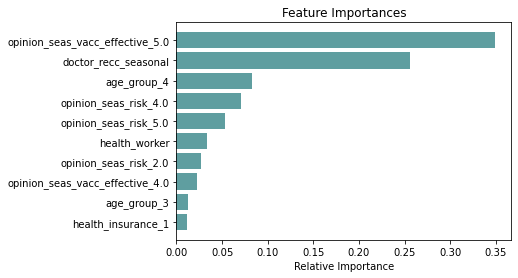

In [41]:
#feature importance is what the tree decided to split on 
plot_importance(model,X_test)

To interpret, the model is indicating that a person's opinion on the seasonal vaccine effectiveness has the greatest impact on whether a person gets vaccinated or not. 

## Model 4

Next, we can add on to the decision tree model and take the ensemble approach. Ensembles stack multiple models to build a high performing model. Let's start with adding a random forest model. 

In [42]:
# Import Random Forest
from sklearn.ensemble import RandomForestClassifier

# first make a baseline random forest model to do a gridsearch on
forest_baseline = RandomForestClassifier()
forest_baseline.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# first do a gridseach to find best params for the random forest model
# set parameters and grid search
param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]}

gridsearch = GridSearchCV(estimator=forest_baseline,
                          param_grid=param)

#Run search & takes a min or two
gridsearch.fit(X_train, y_train)
gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [44]:
# change the parameters based on what the first gridsearch got 

param_2 = {
    'criterion': ['gini'],
    'max_depth': [ 6, 7, 8],
    'min_samples_split': [9, 10, 11],
    'min_samples_leaf': [2]}

gridsearch_2 = GridSearchCV(estimator=forest_baseline,
                          param_grid=param_2)

#Run search & takes a min or two
gridsearch_2.fit(X_train, y_train)
gridsearch_2.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [45]:
# change the parameters based on what the second gridsearch got 
param_3 = {
    'criterion': ['gini'],
    'max_depth': [8, 10, 12],
    'min_samples_split': [8, 9],
    'min_samples_leaf': [2]}

gridsearch_3 = GridSearchCV(estimator=forest_baseline,
                          param_grid=param_3)

#Run search & takes a min or two
gridsearch_3.fit(X_train, y_train)
gridsearch_3.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 2,
 'min_samples_split': 9}

----------------------------------------
MODEL EVALUATION
----------------------------------------
Accuracy : 0.8130304543185222
Precision : 0.7775850104094378
Recall : 0.7141491395793499
f1: 0.7445182724252492
----------------------------------------


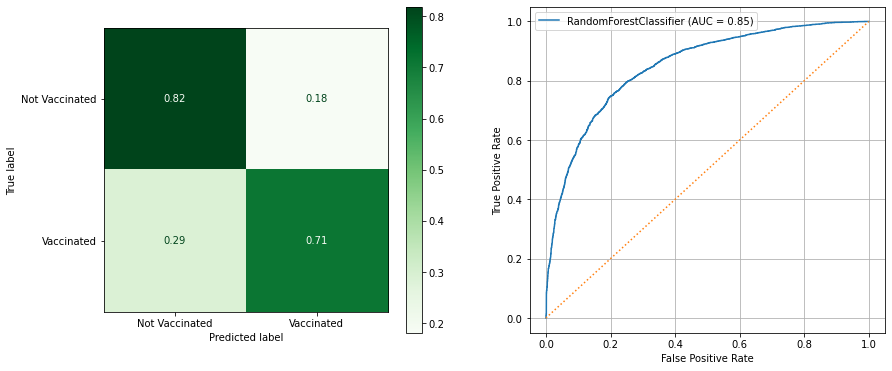

In [46]:
# Run the model evaluation with param_3 to see how it did
params = gridsearch_3.best_params_
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)

model_eval(model,X_test,y_test,
           classes=['Not Vaccinated','Vaccinated']);


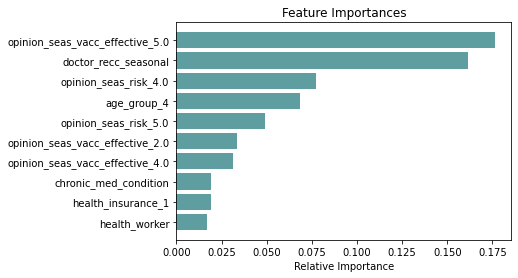

In [47]:
plot_importance(model,X_test)

Compared to the decision tree model the top features have swapped positions and overall the relevance of the important features has dropped.

Model 4 performance is similar to the first model which was a basic logistic regression model. However, model 4 did have a slightly higher accuracy and for that reason we will use model 4 for the interpretation and results. 

## Interpretation

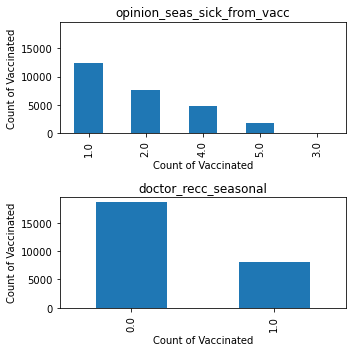

In [48]:
important_cols = ['opinion_seas_sick_from_vacc', 'doctor_recc_seasonal' ]
vacc_only = data[data['seasonal_vaccine']==1]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5,5), sharey=True)

for col, ax in zip(important_cols, axes.flatten()):
    (data.value_counts(col)               
         .plot
         .bar(ax=ax))                
    
    ax.set_title(col, fontsize=12) 
    ax.set_ylabel('Count of Vaccinated')
    ax.set_xlabel('Count of Vaccinated')
  
    
fig.tight_layout()


In [49]:
# to make better looking visualizations for non-tech presentation I renamed the column values
data_rename = data.copy()
df5 = data_rename.astype(str)
df5['doctor_recc_seasonal'].replace({'0.0': 'not recommended', '1.0':'reccomended'}, inplace=True)
df5['seasonal_vaccine'].replace({'0': 'not vaccinated', '1':'vaccinated'}, inplace=True)
df5['opinion_seas_sick_from_vacc'].replace({'1.0': 'Not at all effective', '2.0': 'Not very effective',
                                            '3.0': 'Dont know','4.0': 'Somewhat effective',
                                            '5.0': 'Very effective'}, inplace=True)


In [50]:
groups = df5.groupby(['doctor_recc_seasonal', 'seasonal_vaccine']).size()
groups.describe

<bound method NDFrame.describe of doctor_recc_seasonal  seasonal_vaccine
not recommended       not vaccinated      12155
                      vaccinated           6458
reccomended           not vaccinated       2117
                      vaccinated           5977
dtype: int64>

In [55]:
print(f'Percentage of people vaccinated who where reccommended to get the vaccine: {(5977/(2117+5977))*100}%')
print(f'Percentage of people not vaccinated who where reccommended to get the vaccine: {(2117/(2117+5977))*100}%')
print(dashes)
print(f'Percentage of people vaccinated who where NOT reccommended to get the vaccine: {((6458/(12155+6458))*100)}%')
print(f'Percentage of people not vaccinated who where NOT reccommended to get the vaccine: {((12155/(12155+6458))*100)}%')

Percentage of people vaccinated who where reccommended to get the vaccine: 73.84482332592044%
Percentage of people not vaccinated who where reccommended to get the vaccine: 26.155176674079566%
----------------------------------------
Percentage of people vaccinated who where NOT reccommended to get the vaccine: 34.69618008918498%
Percentage of people not vaccinated who where NOT reccommended to get the vaccine: 65.30381991081502%


Text(0.5, 1.0, 'Survey Response of Doctor Reccomends Vaccine')

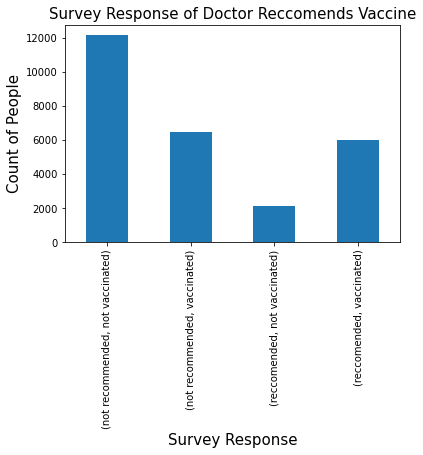

In [52]:
# try out some different plots
groups.plot.bar()

plt.xlabel("Survey Response", size=15)
plt.ylabel("Count of People", size=15)
plt.title('Survey Response of Doctor Reccomends Vaccine', size=15)

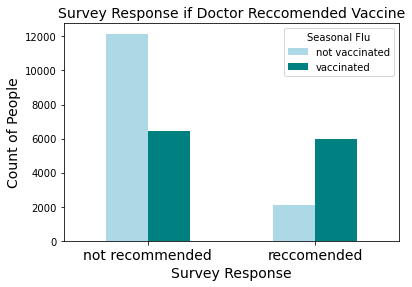

In [53]:
# make visual for non-tech interpetation
pd.crosstab(df5['doctor_recc_seasonal'],df5['seasonal_vaccine']).plot.bar(rot=0, color=['lightblue', 'teal'])

# make it more readable
plt.xlabel("Survey Response", size=14)
plt.ylabel("Count of People", size=14)
plt.title('Survey Response if Doctor Reccomended Vaccine', size=14)
plt.legend(title="Seasonal Flu")
plt.xticks(size=14)

fig.tight_layout()

plt.savefig("images/Survey_recc.png", dpi=150, bbox_inches = "tight")

The visualization shows there is a possible impact of whether a doctor recommends the seasonal flu vaccine to an individual. The amount of people who chose not to get vaccinated but were recommended to get the vaccine was dramatically lower than those who were not recommended. Looking at the percentages of people recommended to get the vaccine vs. those who were not shows: only 35% of people got vaccinated who were not recommend where as 74% of people got vaccinated who were recommend to by a doctor.


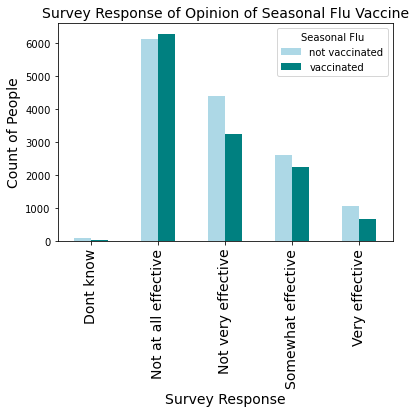

In [54]:
# make visual for non-tech interpetation
pd.crosstab(df5['opinion_seas_sick_from_vacc'],df5['seasonal_vaccine']).plot.bar(color=['lightblue', 'teal'])

# make it more readable
plt.xlabel("Survey Response", size=14)
plt.ylabel("Count of People", size=14)
plt.title('Survey Response of Opinion of Seasonal Flu Vaccine', size=14)
plt.legend(title="Seasonal Flu")
plt.xticks(size=14)

fig.tight_layout()

plt.savefig("images/Survey_Opinion.png", dpi=150, bbox_inches = "tight")

When we visualize the features with the top influences it was interesting to see that the count of people who answered to the different rankings of effectiveness (1-5) was around the same whether the individual was vaccinated or not. The top feature was the opinion that the seasonal vaccine was very effective (a score of 5). Still, surprisingly more individuals who chose not to get vaccinated had this view than the count of those vaccinated.

The main point from the visual would be that the majority of survey takers do not at all think the vaccine is effective. A possible next step would be to look into ways to influence more people into believing the vaccine is effective, however this data showed that even if the public was to be convinced it does not have an obvious correlation with getting vaccinated. From this first glance I would advise with confidence that added efforts to changing peoples' views would lead them to getting the vaccine.

A look at the model's results show the final model had an accuracy of 0.79, a precision of 0.78, and a recall of 0.71. To answer the business question, a high precision is important. This is because we want to focus on people who are correctly identified as vaccinated or not, and understand their survey responses. We want to make sure the model is analysing relevant data. Surveys that are grouped incorrectly, those responses will be associated with the wrong group and disrupt the quality of the model’s results.  

## CONCLUSIONS & RECOMMENDATIONS


In summary, The model showed:
- The model found the most important question on the survey in predicting if someone was vaccinated was if they felt the vaccine was ‘very effective’.
- The second most important question was if a doctor recommended they get vaccinated.
- A closer look into the survey response of the opinion of the seasonal flu vaccine effectiveness showed the connection is unclear between peoples opinions and getting vaccinated. For this reason, at this stage in the investigation I do not advise the client assume that changing the opinion of people will raise vaccination rates.
- The model did show there is a connection between people getting the vaccine once they were recommended to by a doctor because of this, I recommend the client consider ways they can incentivise or encourage doctors to recommend the seasonal flu vaccine to their patients. 

The next steps include gaining and looking into more data on doctors recommending the seasonal flu vaccine. This analysis just touches the surface of the impacts of doctors recommending the seasonal flu vaccine. Further investigation into who, why, and why not doctors recommend the seasonal flu vaccine could be beneficial. I suggest this because before developing methods on how to get more doctors to recommend the vaccine it is important to understand the medical reasons doctors make the decisions they do when it comes to recommending the flu vaccine.

A further improvement of this model could also prove beneficial. Currently the precision of this model is at 0.78 which is not horrible but also not completely trustworthy. There are many ways to continue tuning this model which could possibly lead to better performance. A tuning method that could be added to this model gradient boosting.  
